In [104]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [105]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.inv(np.matmul(np.transpose(tx), tx))
    w = np.matmul(w,np.transpose(tx))
    w = np.matmul(w,y)
    return w
    raise NotImplementedError
    
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    #Calculate the loss. You can calculate the loss using mse or mae
    e = (y-tx.dot(w))**2
    #print(y.shape, tx.dot(w))
    return np.mean(e)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [106]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    w = least_squares(y, tx)
    print(compute_loss(y,tx,w))
    #raise NotImplementedError

Test it here

In [107]:
test_your_least_squares()

30.7717757376588


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [108]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [109]:
def build_poly2(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    a = np.zeros((len(x),degree))
    for i in range(0,len(x)):
        for j in range(0,degree):
            a[i][j] = x[i]**j
            
    return a
    
    #raise NotImplementedError

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [110]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        a = np.zeros((len(x),degree))
        for i in range(0,len(x)):
            for j in range(0,degree):
                a[i][j] = x[i]**j
        x_deg = a
        
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        w = least_squares(y,x_deg)
        rmse = compute_loss(y,x_deg,w)
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(y, x, w, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.5010949203781332


NotImplementedError: 

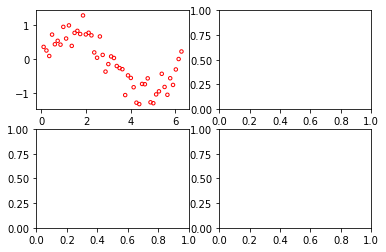

In [111]:
len(x)
polynomial_regression()


In [ ]:
degree


In [ ]:
np.shape(x)[0]

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [112]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    indices = []
    for j in range(len(x)):
        indices.append(j)
    np.random.shuffle(indices)
    num_training_instances = int(ratio*len(x))
    train_indices = indices[:num_training_instances]
    test_indices = indices[num_training_instances:]
    
    # split the actual data
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test
    
    raise NotImplementedError

Then, test your `split_data` function below.

In [113]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    
    # ***************************************************
    x_train, x_test, y_train, y_test = split_data(x,y, ratio, seed)
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train_deg = build_poly2(x_train, degree)
    x_test_deg = build_poly2(x_test, degree)
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    w = least_squares(y_train, x_train_deg)
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = compute_loss(y_train,x_train_deg,w)
    rmse_te = compute_loss(y_test,x_test_deg,w)
    #raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [114]:
seed = 56
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.492, Testing RMSE=0.580
proportion=0.9, degree=3, Training RMSE=0.195, Testing RMSE=0.482
proportion=0.9, degree=7, Training RMSE=0.055, Testing RMSE=0.142
proportion=0.9, degree=12, Training RMSE=0.056, Testing RMSE=0.227
proportion=0.5, degree=1, Training RMSE=0.446, Testing RMSE=0.616
proportion=0.5, degree=3, Training RMSE=0.158, Testing RMSE=0.450
proportion=0.5, degree=7, Training RMSE=0.052, Testing RMSE=0.117
proportion=0.5, degree=12, Training RMSE=0.061, Testing RMSE=102.017
proportion=0.1, degree=1, Training RMSE=0.533, Testing RMSE=0.667
proportion=0.1, degree=3, Training RMSE=0.018, Testing RMSE=3.099
proportion=0.1, degree=7, Training RMSE=0.042, Testing RMSE=21.898
proportion=0.1, degree=12, Training RMSE=4.478, Testing RMSE=607.562


# 3 Ridge Regression
Please fill in the function below.

In [115]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = np.linalg.inv(np.matmul(np.transpose(tx), tx)+ lambda_*np.identity(np.shape(tx)[1]))
    w = np.matmul(w,np.transpose(tx))
    w = np.matmul(w,y)
    return w
    raise NotImplementedError

In [117]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, x_test, y_train, y_test = split_data(x,y, ratio, seed)
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train_deg = build_poly2(x_train, degree)
    x_test_deg = build_poly2(x_test, degree)
    #raise NotImplementedError
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w = ridge_regression(y_train, x_train_deg, lambda_)
        rmse_tr.append(np.sqrt(2*compute_loss(y_train,x_train_deg,w)))
        rmse_te.append(np.sqrt(2*compute_loss(y_test,x_test_deg,w)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    #raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.339, Testing RMSE=0.372
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.339, Testing RMSE=0.373
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.340, Testing RMSE=0.374
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.340, Testing RMSE=0.375
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.341, Testing RMSE=0.376
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.342, Testing RMSE=0.379
proportion=0.5, degree=7, lambda=0.193, 

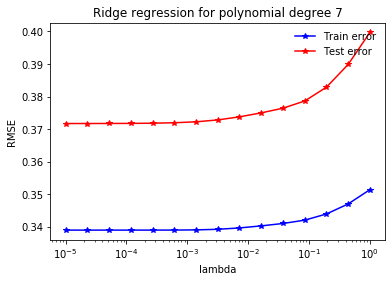

In [125]:
seed = 27
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [134]:
x[1]

4.895123299

In [138]:
(build_poly2(x,4)[1])

array([  1.        ,   4.8951233 ,  23.96223211, 117.29808071])